In [5]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires (1).csv


In [7]:
data=pd.read_csv("forestfires.csv")

In [8]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
data.shape

(517, 31)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [12]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [14]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [15]:
data1= data.drop_duplicates()

In [16]:
data2=data1.drop(data1.columns[11:30],axis=1)

In [17]:
data2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


#Converting categorical columns to numeric using Label encoding

In [18]:
data2["month"]=label.fit_transform(data2["month"])
data2["day"]=label.fit_transform(data2["day"])
data2["size_category"]=label.fit_transform(data2["size_category"])

In [19]:
data2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


#Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b0eb55190>,
      dtype=object)

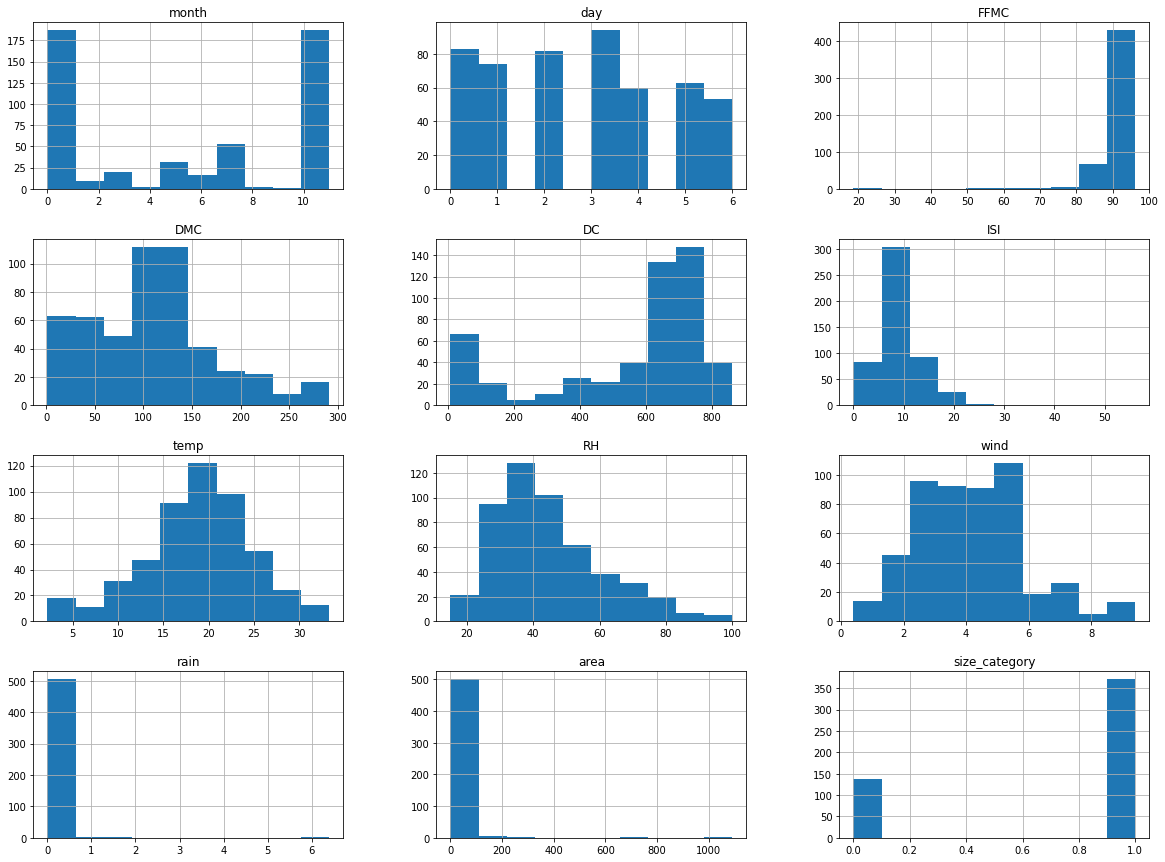

In [32]:
import matplotlib.pyplot as plt

data2.hist(figsize=(20,15))

#Distplot

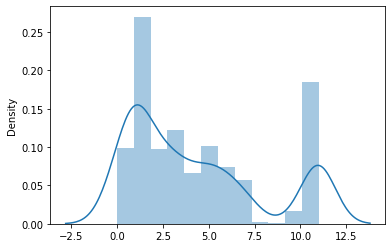

In [43]:
import seaborn as sns
sns.distplot(data2[['month','day']])

plt.show()

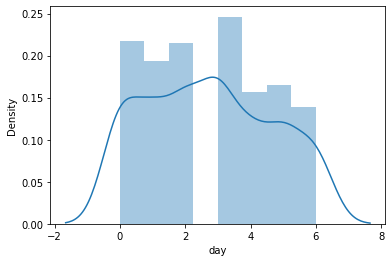

In [44]:
sns.distplot(data2['day'])

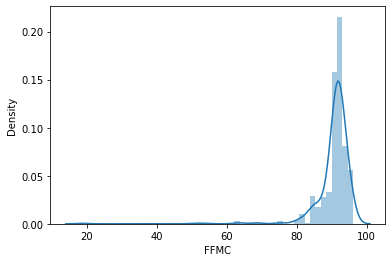

In [45]:
sns.distplot(data2['FFMC'])


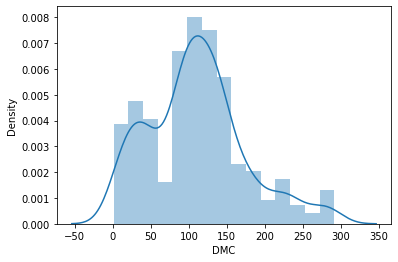

In [46]:
	
  sns.distplot(data2['DMC'])

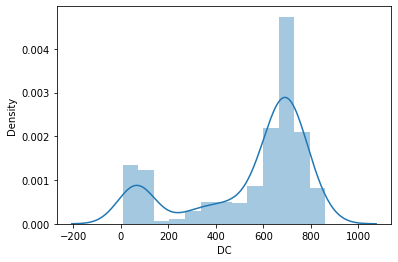

In [48]:
	
  sns.distplot(data2['DC'])

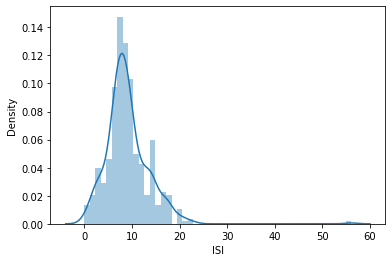

In [50]:
	
sns.distplot(data2['ISI'])

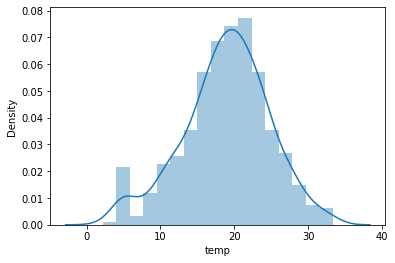

In [51]:

sns.distplot(data2['temp'])

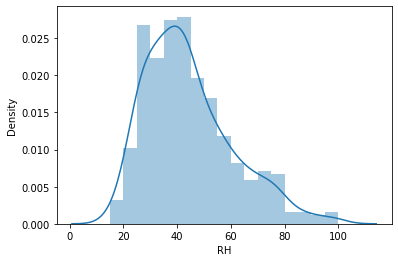

In [52]:
sns.distplot(data2['RH'])

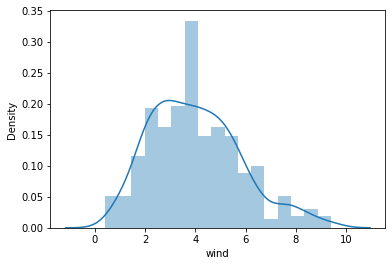

In [54]:
sns.distplot(data2['wind'])

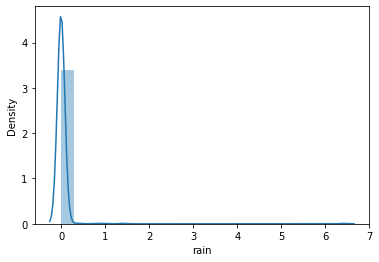

In [55]:
sns.distplot(data2['rain'])

#Boxplot

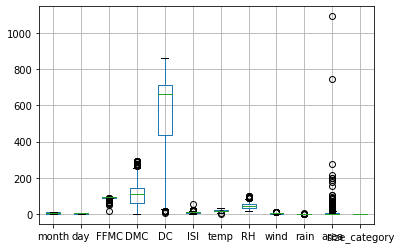

In [59]:
import matplotlib.pyplot as plt
data2.boxplot()

In [60]:
x=data2.iloc[:,:11]
y=data2.iloc[:,-1]

In [61]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [62]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int64

#Scaling the data

In [64]:
# Standardization
a = StandardScaler()
a.fit(x)
x_standardized = a.transform(x)

In [66]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02
mean,1.395958e-16,-8.375749e-17,-1.120256e-15,-1.395958e-16,6.979791e-17,-1.343610e-16,2.303331e-16,1.465756e-16,1.395958e-16,-1.395958e-17,-1.744948e-17
std,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00
min,-1.329184e+00,-1.424495e+00,-1.295805e+01,-1.712164e+00,-2.177385e+00,-1.969965e+00,-2.855946e+00,-1.789299e+00,-2.007272e+00,-6.903477e-02,-2.027913e-01
25%,-1.100464e+00,-9.039866e-01,-7.532785e-02,-7.520348e-01,-4.439871e-01,-5.727610e-01,-5.938679e-01,-7.494866e-01,-7.288945e-01,-6.903477e-02,-2.027913e-01
50%,4.313783e-02,1.370296e-01,1.769213e-01,-3.036890e-02,4.694951e-01,-1.361347e-01,7.447337e-02,-1.378325e-01,-6.333465e-03,-6.903477e-02,-1.932706e-01
75%,1.186740e+00,6.575378e-01,4.111527e-01,4.873480e-01,6.699368e-01,4.314794e-01,6.742668e-01,5.349871e-01,4.939011e-01,-6.903477e-02,-1.000917e-01
max,1.186740e+00,1.698554e+00,1.005740e+00,2.840606e+00,1.261583e+00,1.027740e+01,2.473647e+00,3.409762e+00,2.995074e+00,2.155478e+01,1.682288e+01


#Hyperparameter Tuning

1.Batch size
2.Epochs

In [68]:
 #Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam

In [69]:
#create model
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(15, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(11,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [71]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100,150]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=1.000 total time=   2.8s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.971 total time=   1.6s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.961 total time=   2.1s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.931 total time=   2.1s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.950 total time=   2.1s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

[CV 4/5; 9/12] END ....batch_size=40, epochs=10;, score=0.941 total time=   1.1s
[CV 5/5; 9/12] START batch_size=40, epochs=10...................................


[CV 5/5; 9/12] END ....batch_size=40, epochs=10;, score=0.832 total time=   1.1s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................
[CV 1/5; 10/12] END ...batch_size=40, epochs=50;, score=1.000 total time=   2.1s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................
[CV 2/5; 10/12] END ...batch_size=40, epochs=50;, score=0.971 total time=   2.2s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................
[CV 3/5; 10/12] END ...batch_size=40, epochs=50;, score=0.951 total time=   3.6s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................
[CV 4/5; 10/12] END ...batch_size=40, epochs=50;, score=0.971 total time=   2.7s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................
[CV 5/5; 10/12] END ...batch_size=40, epochs=50;, score=0.911 total time=   3.6s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................
[CV 1/5; 11/12] END ..batch_

In [72]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9723937034606933, using {'batch_size': 10, 'epochs': 100}
0.9626480221748352,0.022748808330837467 with: {'batch_size': 10, 'epochs': 10}
0.966511356830597,0.02477646916345678 with: {'batch_size': 10, 'epochs': 50}
0.9723937034606933,0.028960179694651755 with: {'batch_size': 10, 'epochs': 100}
0.9586488008499146,0.030269131322674128 with: {'batch_size': 10, 'epochs': 150}
0.9370413422584534,0.03567644155907446 with: {'batch_size': 20, 'epochs': 10}
0.9606289982795715,0.02994249044817192 with: {'batch_size': 20, 'epochs': 50}
0.9468840956687927,0.02697340125948332 with: {'batch_size': 20, 'epochs': 100}
0.9547078251838684,0.03404011870792322 with: {'batch_size': 20, 'epochs': 150}
0.8133954644203186,0.1699983722525353 with: {'batch_size': 40, 'epochs': 10}
0.9606095790863037,0.029378218676912288 with: {'batch_size': 40, 'epochs': 50}
0.9626091837882995,0.020210053140638652 with: {'batch_size': 40, 'epochs': 100}
0.9606289982795715,0.027253711904965602 with: {'batch_size': 40, 'e

#Tuning of Hyperparameters:- Learning rate and Drop out rate

In [73]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(15,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   7.8s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   7.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.971 total time=  10.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.961 total time=  11.1s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.941 total time=  11.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [74]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9842166543006897, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9704717397689819,0.018786331386405366 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.966511344909668,0.023988050782446448 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9273539066314698,0.08283753854362494 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9783343076705933,0.020129902511018215 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9625897765159607,0.024596056310897754 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9390797972679138,0.0330770784912364 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9842166543006897,0.020348082015332197 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9685109615325928,0.01917937918266548 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9095903515815735,0.08825724974246703 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [75]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(15,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.990 total time=  11.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.765 total time=   8.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.627 total time=   8.2s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.814 total time=  11.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.822 total time=  11.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [76]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9881770491600037, using {'activation_function': 'tanh', 'init': 'normal'}
0.8035721182823181,0.11644090245201837 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8212191700935364,0.09908791836359612 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7760629057884216,0.15625408360410545 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9842360615730286,0.01604453162057243 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9743739008903504,0.0283513845890954 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.9783148884773254,0.023714260196355353 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9881770491600037,0.014480391146928421 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9822558760643005,0.021974252470505783 with: {'activation_

#Tuning of Hyperparameter :-Number of Neurons in activation layer

In [77]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=  11.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=  11.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   7.5s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   7.5s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.931 total time=   8.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [78]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9862162709236145, using {'neuron1': 8, 'neuron2': 8}
0.9782954812049866,0.028234330043589054 with: {'neuron1': 4, 'neuron2': 2}
0.9861968517303467,0.01720983315705541 with: {'neuron1': 4, 'neuron2': 4}
0.9802950859069824,0.0207041434663443 with: {'neuron1': 4, 'neuron2': 8}
0.9842166543006897,0.020348082015332197 with: {'neuron1': 8, 'neuron2': 2}
0.9842360734939575,0.019307178542608914 with: {'neuron1': 8, 'neuron2': 4}
0.9862162709236145,0.017147477068017544 with: {'neuron1': 8, 'neuron2': 8}
0.9763735175132752,0.022122736469024216 with: {'neuron1': 16, 'neuron2': 2}
0.9822558641433716,0.0191710087390652 with: {'neuron1': 16, 'neuron2': 4}
0.9822752833366394,0.01806450750983408 with: {'neuron1': 16, 'neuron2': 8}


#Training model with optimum values of Hyperparameters

In [91]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'tanh'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(x_standardized,y)

# Predicting using trained model

y_predict = model.predict(x_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

16/16 [==============================] - 0s 2ms/step
0.9941060903732809
